# Центральная предельная теорема: Распределение Парето
https://ru.wikipedia.org/wiki/Распределение_Парето

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

### Генерация выборки

In [2]:
k = 4
xm = 3

teory = sts.pareto(k, loc=0, scale=xm)
example = teory.rvs(1000)
print(f'Mean: {teory.mean().round(2)}')
print(f'Standard deviation: {teory.std().round(2)}')

Mean: 4.0
Standard deviation: 1.41


### Гистограмма выборки и график теоритеческой плотности распределения случайной величины

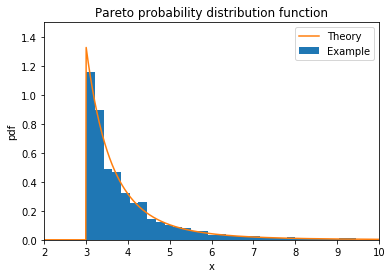

In [3]:
temp = np.linspace(0, 10, 1000)

#гистограмма выборки
plt.hist(example, bins='auto', density=True, label='Example')

#теоретическая плотность распределения
plt.plot(temp, teory.pdf(temp), label='Theory')

plt.axis([2, 10, 0, 1.5])
plt.title('Pareto probability distribution function')
plt.xlabel('x')
plt.ylabel('pdf')
plt.legend()
pass

### Генерация выборкок объема n и построение гистограммы распределений их выборочных средних

In [4]:
num = 1000
volume = (5, 10, 50)

In [5]:
#массив выборочных средних значений
ds = np.zeros((len(volume), num))
for i in range(len(volume)):
    for j in range(num):
        ds[i, j] = np.array(sts.pareto.rvs(k, loc=0, scale=xm, size=volume[i])).mean()

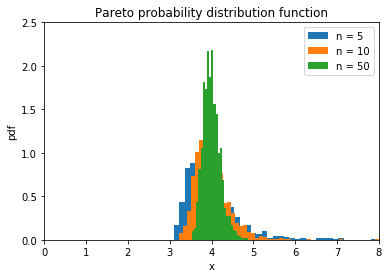

In [6]:
#гистограммы выборки
for i in range(len(volume)):
    plt.hist(ds[i], bins='auto', density=True, label=f'n = {volume[i]}')
    plt.axis([0, 8, 0, 2.5])
    plt.title('Pareto probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

### Вычисление параметров нормального распределения

In [7]:
#Математическое ожидание
dsM = k * xm / (k - 1)

In [8]:
#Дисперсия
dsV = np.zeros(len(volume))
for i in range(len(volume)):
    dsV[i] = (xm**2 * k / ((k - 1)**2 * (k - 2))) / volume[i]

In [9]:
print('Математическое ожидание:', dsM)
for i in range(len(volume)):
    print(f'Дисперсия для n = {volume[i]}: {dsV[i]}')

Математическое ожидание: 4.0
Дисперсия для n = 5: 0.4
Дисперсия для n = 10: 0.2
Дисперсия для n = 50: 0.04


### Построение графика соответствующего нормального распределения для каждой гистограммы

In [10]:
def draw(each=False):
    for i in range(len(volume)):
        plt.hist(ds[i], bins='auto', density=True, label=f'n = {volume[i]}')
        plt.axis([0, 8, 0, 2.5])
        if each:
            plt.title(f'Pareto probability distribution function for n = {volume[i]}')
        else:
            plt.title('Pareto probability distribution function')
        plt.xlabel('x')
        plt.ylabel('pdf')
        plt.legend()
        
        # зададим нормально распределенную случайную величину
        normRv = sts.norm(loc=dsM, scale=np.sqrt(dsV[i]))
        pdf = normRv.pdf(temp)
        plt.plot(temp, pdf)
        if each:
            plt.show()

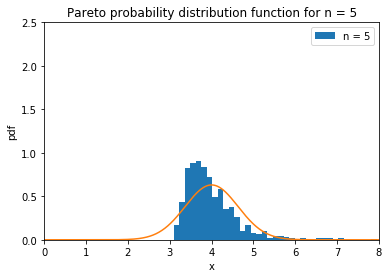

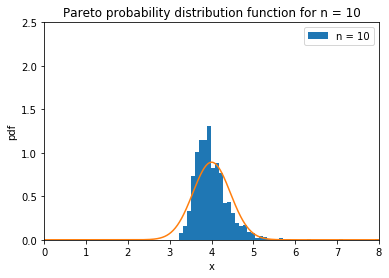

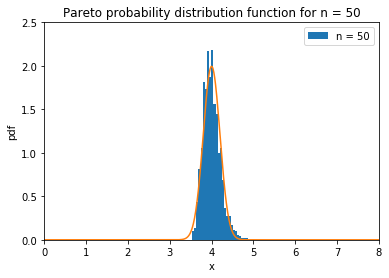

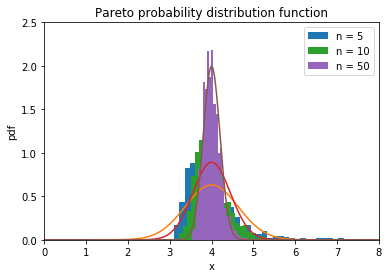

In [11]:
draw(each=True)
draw()

### Выводы
Распределение выборочных средних хорошо описывается нормальным распределением, что и утверждает центральная предельная теорема

С ростом n точность нормальной аппроксимации увеличивается